<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/1%EC%9E%A5/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [3]:
#예시
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data=np.column_stack((fish_length, fish_weight))

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [7]:
fish_target=np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
from sklearn.model_selection import train_test_split
#트레인테스트스플릿하기!!!!!!!!!!!!!!!!!!!!!!

train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, random_state=42)

In [9]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [11]:
train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
#stratify=fish_target은 클래스 비율에 맞게 데이터를 나눈다는 것. 훈련데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용하다

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

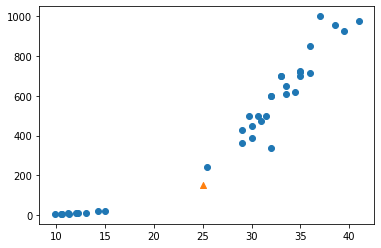

In [13]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
plt.show()

#임의의 데이터를 분류해보자 !! 일단 scatter에서 보여주자 위치를 

In [16]:
distances, indexes= kn.kneighbors([[25,150]])
#이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다!

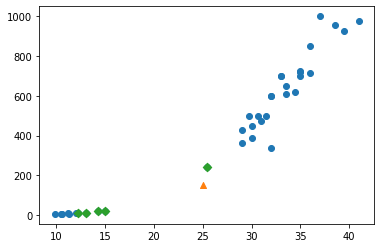

In [17]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.show()
#샘플 추출이 편향적이게 됐음이 확인된다. 

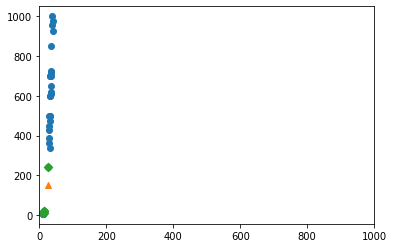

In [18]:
#이유는 X축은 범위가 좁고 y축은 범위가 넓기 때문이다. 
#따라서 x축의 범위를 동일하게 맞춰줘야함 ㅠㅠ xlim()사용
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlim((0,1000))
plt.show()

#둘의 범위를 동이라헥 맞추니 생선의 무게인 y축만 고려대상이된다.
#위처럼 특성의 값 범위가 매우 다른 것을 두 특성의 스케일이 다르다고 한다. 따라서 이를 맞춰주는 과정(전처리)가 필요

In [19]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)

#train_input은 (36,2) 크기의 배열이다. 특성마다 값의 스케일이 다르므로 평균과 표준편차는 각 특성별로 게싼해야한다.
#그래서 axis=0임. 행을 따라 열의 통계값을 계산하기위해!!!!!!!!!!!!!!!!!
#axis=1dlaus  각 행의 통계값을 계산하는 것


In [20]:
train_scaled=(train_input-mean)/std
#넘파이 배열이라서 가능한 브로드캐스팅

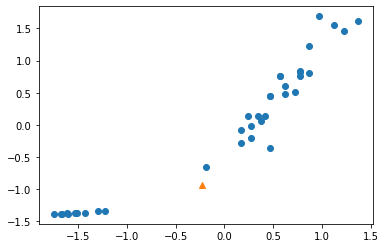

In [23]:
new=([25,150]-mean)/std
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.show()

In [24]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
test_scaled=(test_input-mean)/std

In [26]:
kn.score(test_scaled, test_target)

1.0

In [ ]:
#스케일을 조정하는 방법은 표준점수말고도 더 있는데 대부분의 경우 표준점수로 충분하다. 